# **Capital Bikeshare**
---

<div style="text-align: center">    
    <img src="cbike.jpg" alt="Capital Bikeshare" width="550" height="350">
</div>

# **Business Understanding and Business Problem**

## **Business Understanding**

**Introduction**

Bike sharing is a transporation service that allows people to rent bikes for transportation or recreation, promoting convinient, eco-friendly, and cost-effective urban mobility. Capital Bikeshare is one of the largest bike-sharing system in the United States that launched in 2010. It is a bike-sharing system that operates in Washington D.C. metropolitan area, providing a convinient and environtment friendly mode of transporation for both locals and tourists. It has hundreds of bike stations spread across the city and its suburbs. The service allows users to rent bikes from one station and return them to another station, promoting flexibility and reducing the need for private car usage.

**Features**
- **dteday**: date
- **season**: season
    - 1: winter
    - 2: spring
    - 3: summer
    - 4: fall
- **hr**: hour (0 to 23)
- **holiday**: holiday or not
- **temp**: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- **atemp**: normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- **hum**: normalized humidity. The values are divided into 100 (max)
- **casual**: count of casual users
    - Includes Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass
- **registered**: count of registered users
    - Includes Annual Member, 30-Day Member or Day Key Member
- **cnt**: count of total rental bikes including both casual and registered
- **weathersit**:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## **Business Problem**

**Overview / Problem Statement**

As bike sharing system grows in popularity, understanding the factors that influence bike rental demand is crucial for effective management, optimization, and service delivery. Capital Bikeshare faces the challenge of balancing supply and demand. By predicting demand, the system can ensure that enough bikes are available at high-demand stations during peak periods and optimize bike redistribution efforts, ensuring bikes are available where and when customers need them most. The demand for rentals fluctuates based on factors such as time of day, weather, holidays, season, and temperature.

**Goal**

From the business problem that we have stated above, bike rental companies or operators, in this case Capital Bikeshare, needs a 'tool' that predict the demand for bike rental. They can use the model to forecast demand and optimize bike inventory, staffing, or pricing based on the expected usage patterns.

**Analytic Approach**

We need to find the hidden pattern in the available features that influence rental counts. Then, we will develop a regression model to help bike rental companies predict the demand for bike rental more accurately.

**Evaluation Metrics**

The evaluation metrics that will be used are:

1. **Root Mean Squared Error (RMSE)**
    - Measures the square root of the average squared differences between predicted and actual values.
    - Sensitive to outliers.
$$RMSE = \sqrt{\frac{\Sigma{(Y_i - \hat{Y_i})^2}}{n}}$$
2. **Mean Absolute Error (MAE)**
    - Measures the average of the absolute differences between predicted and actual values.
    - Robust to outliers compared to RMSE.
$$MAE = \frac{\Sigma{|Y_i - \hat{Y_i}|}}{n}$$
3. **Mean Absolute Percentage Error (MAPE)**
    - Measures the average percentage error, normalized by the actual values.
    - Skewed heavily if target values include very small numbers (division by near-zero values inflates MAPE).
$$MAPE = \frac{1}{n}\Sigma|\frac{Y_i - \hat{Y_i}}{Y_i}|$$

# **Data Understanding**

- The dataset contains bike rental data from Capital Bikeshare for the years 2011-2012.
- Each row represents data from a bike rental system, with each column capturing a specific aspect of bike rental activity on a given day.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | object | date |
| hum | float | normalized humidity |
| weathersit | integer | weather condition (1: clear, 2: misty, 3: light precipitation, 4: stormy) |
| holiday | integer | holiday or not |
| season | integer | season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp | float | normalized feeling temperature |
| temp | float | normalized temperature |
| hr | integer | rental hour |
| casual | integer | count of casual users |
| registered | integer | count of registered users |
| cnt | integer | count of total rental bikes including both casual and registered |

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2293]:
df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [2294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [2295]:
# check duplicate
df.duplicated().sum()

np.int64(0)

In [2296]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


The data type of `dteday` colummn is an object, we will convert it to a datetime data type.

In [2297]:
df['dteday'] = pd.to_datetime(df['dteday'])

The values in the `weathersit` column are 1, 2, 3, 4, representing the following weather conditions:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

For weathersit = 1, we will categorize the weather as **clear**, for weathersit = 2 as **misty**, for weathersit = 3 as **light precipitation**, and for weathersit = 4 as **stormy**.

The values in the `season` column are 1, 2, 3, 4, representing the following seasons:
- 1: Winter
- 2: Spring
- 3: Summer
- 4: Fall

In [2298]:
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'misty', 3: 'light precipitation', 4: 'stormy'})
df['season'] = df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [2299]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,clear,0,fall,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,clear,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,clear,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,misty,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,clear,0,summer,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,clear,0,winter,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,clear,0,summer,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,misty,1,winter,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,misty,0,spring,0.4242,0.42,2,14,55,69


Since date cannot be directly computed and acts as an identifier, we can extract valuable features from the `dteday` column, such as the year, month, day, day of the week, and whether the date falls on a weekend.

In [2300]:
df.insert(1, 'year', df['dteday'].dt.year)
df.insert(2, 'month', df['dteday'].dt.month)
df.insert(3, 'day', df['dteday'].dt.day)
df.insert(4, 'dayofweek', df['dteday'].dt.dayofweek)
df.insert(5, 'isweekend', df['dayofweek'].isin([5,6]).map({True: 1, False: 0}))

In [2301]:
df.head()

,dteday,year,month,day,dayofweek,isweekend,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,2011,12,9,4,0,0.62,clear,0,fall,0.3485,0.36,16,24,226,250
1,2012-06-17,2012,6,17,6,1,0.64,clear,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,2011,6,15,2,0,0.53,clear,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,2012,3,31,5,1,0.87,misty,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,2012,7,31,1,0,0.55,clear,0,summer,0.6970,0.76,18,99,758,857


In [2302]:
# make a summary dataframe that includes column's data type, unique count, number of missing values, and unique values

summary = []

for col in df.columns:
    summary.append([col, df[col].dtype, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

pd.DataFrame(columns=['column name', 'data type', 'unique count', 'missing values', 'unique values'], data=summary)

,column name,data type,unique count,missing values,unique values
0,dteday,datetime64[ns],731,0,"[2011-12-09 00:00:00, 2012-06-17 00:00:00, 201..."
1,year,int32,2,0,"[2011, 2012]"
2,month,int32,12,0,"[12, 6, 3, 7, 10, 8, 1, 2, 5, 9, 4, 11]"
3,day,int32,31,0,"[9, 17, 15, 31, 1, 28, 13, 21, 7, 4, 27, 18, 2..."
4,dayofweek,int32,7,0,"[4, 6, 2, 5, 1, 0, 3]"
5,isweekend,int64,2,0,"[0, 1]"
6,hum,float64,89,0,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
7,weathersit,object,4,0,"[clear, misty, light precipitation, stormy]"
8,holiday,int64,2,0,"[0, 1]"
9,season,object,4,0,"[fall, spring, summer, winter]"


The dataframe now contains 16 columns, an increase from the previous 11, with no missing values in any of the columns.

Since `cnt` represents the total count of rental bikes, including both casual and registered users, we will verify whether the `cnt` column is the sum of the `casual` and `registered` columns.

In [2368]:
if np.any(df['casual'] + df['registered'] == df['cnt']):
    print('yes, casual + registered = cnt')
else:
    print('no, casual + registered ≠ cnt')

yes, casual + registered = cnt


In [ ]:
# check the descriptive statistic for numerical columns
df.describe()

,dteday,year,month,day,dayofweek,isweekend,hum,holiday,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,2011.501932,6.510974,15.642828,3.005261,0.285984,0.625451,0.029758,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,2011.000000,4.000000,8.000000,1.000000,0.000000,0.470000,0.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,7.000000,16.000000,3.000000,0.000000,0.620000,0.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,2012.000000,9.000000,23.000000,5.000000,1.000000,0.780000,0.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,2012.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.500017,3.433995,8.805860,1.992993,0.451901,0.192102,0.169925,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


# **Exploratory Data Analysis**

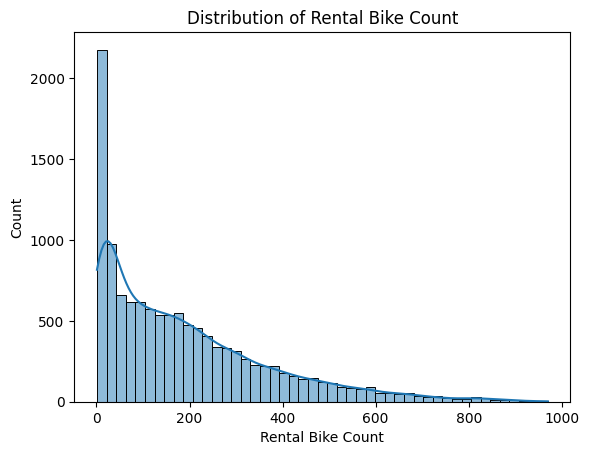

In [2305]:
plt.title('Distribution of Rental Bike Count')
sns.histplot(x=df['cnt'], kde=True)
plt.xlabel('Rental Bike Count')
plt.show()

The rental bike count distribution plot above shows a right-skewed distribution, indicating that the majority of rental counts are at lower values, with only a few higher counts.

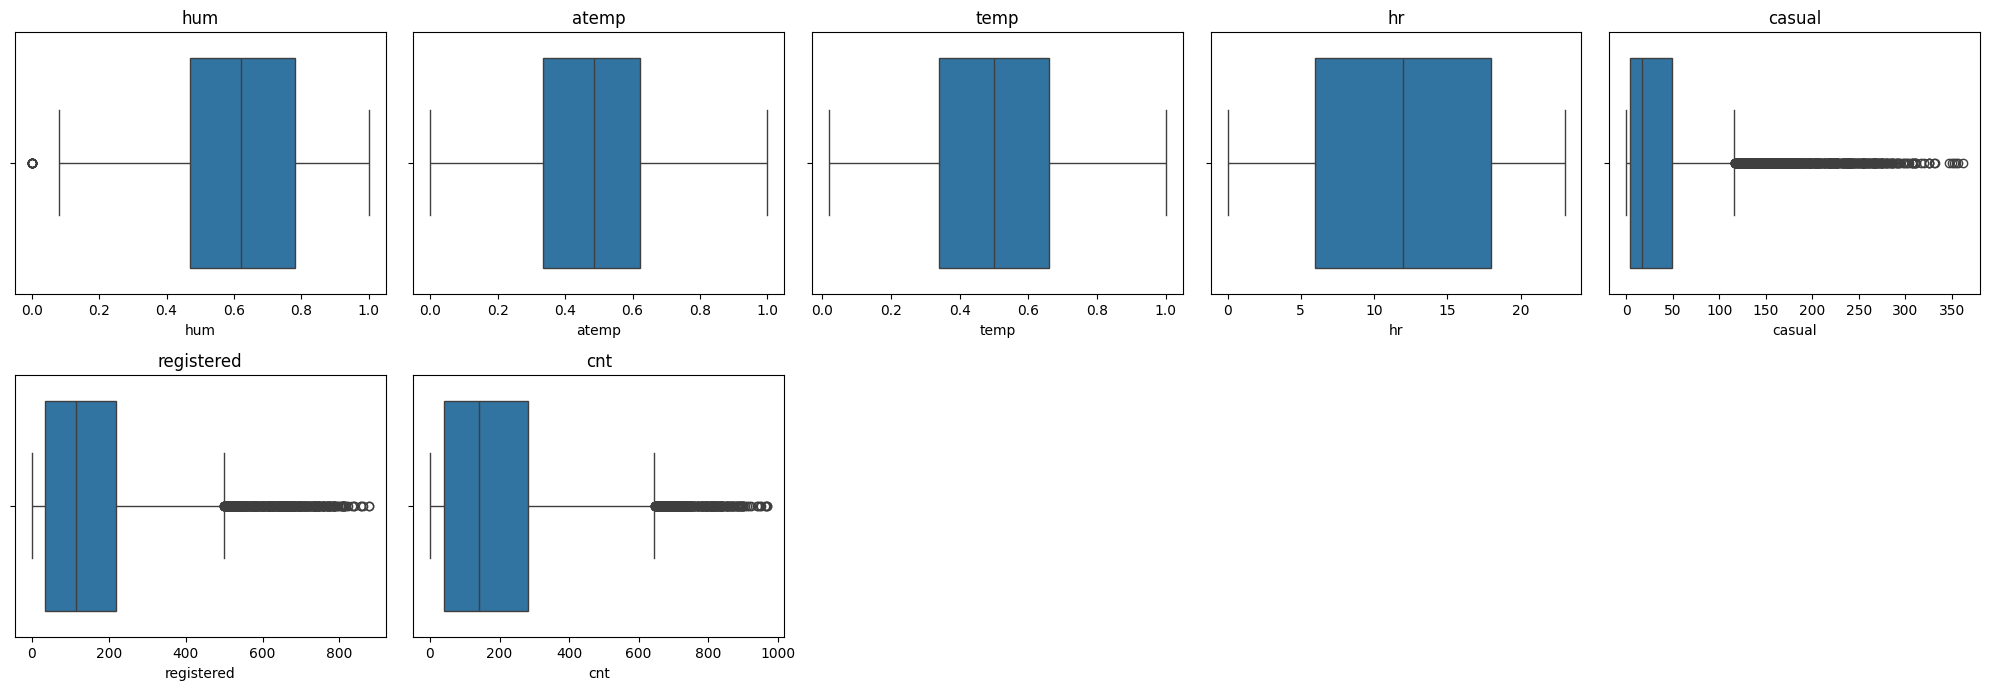

In [2306]:
plt.figure(figsize=(20, 10))

col_num = []
for i in df.columns:
    if (df[i].dtype == 'float64') | (df[i].dtype == 'int64') and i not in ['isweekend', 'holiday']:
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

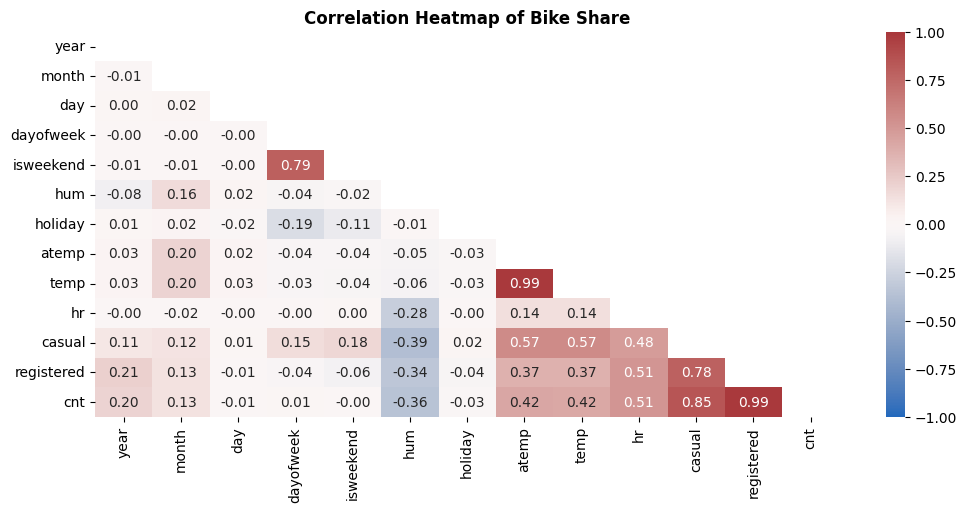

In [2307]:
plt.figure(figsize=(12,5))
plt.title('Correlation Heatmap of Bike Share', fontweight='bold')
sns.heatmap(df.corr('spearman', numeric_only=True), annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1, mask=np.triu(np.ones_like(df.corr('spearman', numeric_only=True), dtype=bool)))
plt.show()

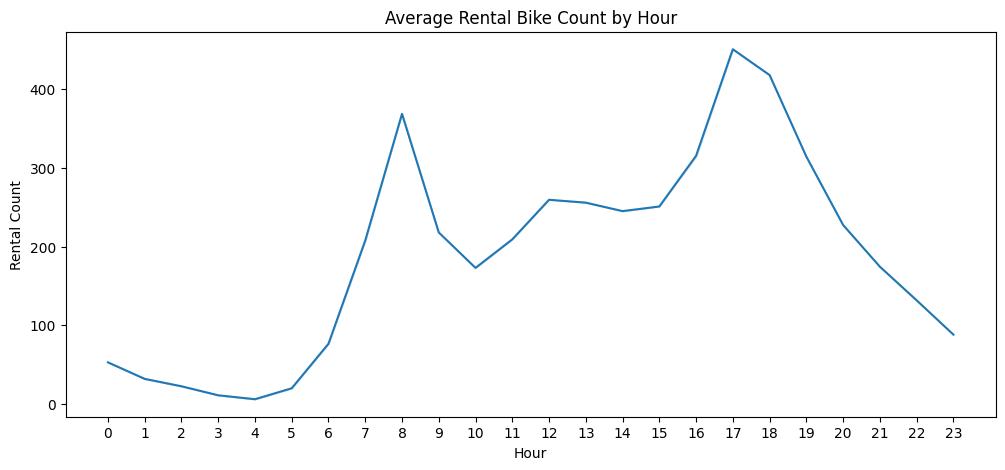

In [2433]:
plt.figure(figsize=(12,5))
plt.title('Average Rental Bike Count by Hour')
sns.lineplot(x=df['hr'], y=df['cnt'], errorbar=('ci', False))
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(df['hr'].unique())
# plt.grid()
plt.show()

Total rental bikes peak at 8 AM and 5 PM, likely due to people starting work at 8 AM and leaving at 5 PM. These times coincide with typical commuting hours, suggesting that the demand for bikes is influenced by daily work schedules and the need for transportation during rush hours.

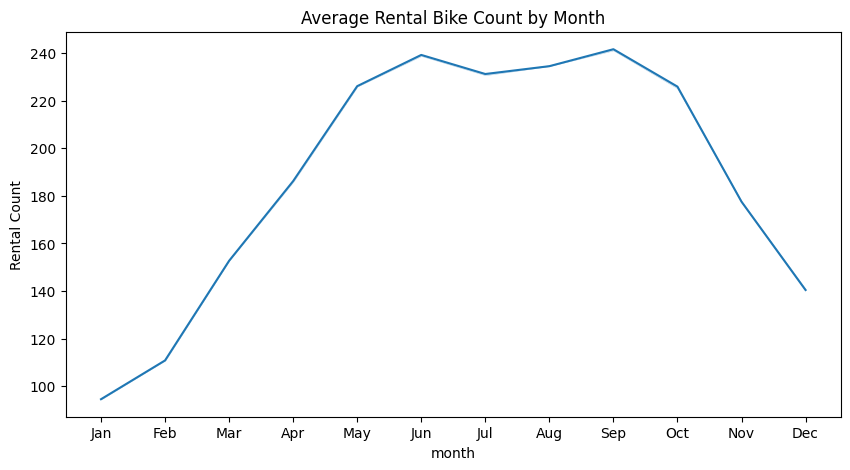

In [2367]:
plt.figure(figsize=(10,5))
plt.title('Average Rental Bike Count by Month')
sns.lineplot(x=df['month'], y=df['cnt'], errorbar=('ci', False))
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Rental Count')
plt.show()

Bike rental begin to increase in February and decline  in October, peaking in June and September. This pattern is likely influenced by the weather, with higher demand during warmer months and more favorable conditions for outdoor activities.

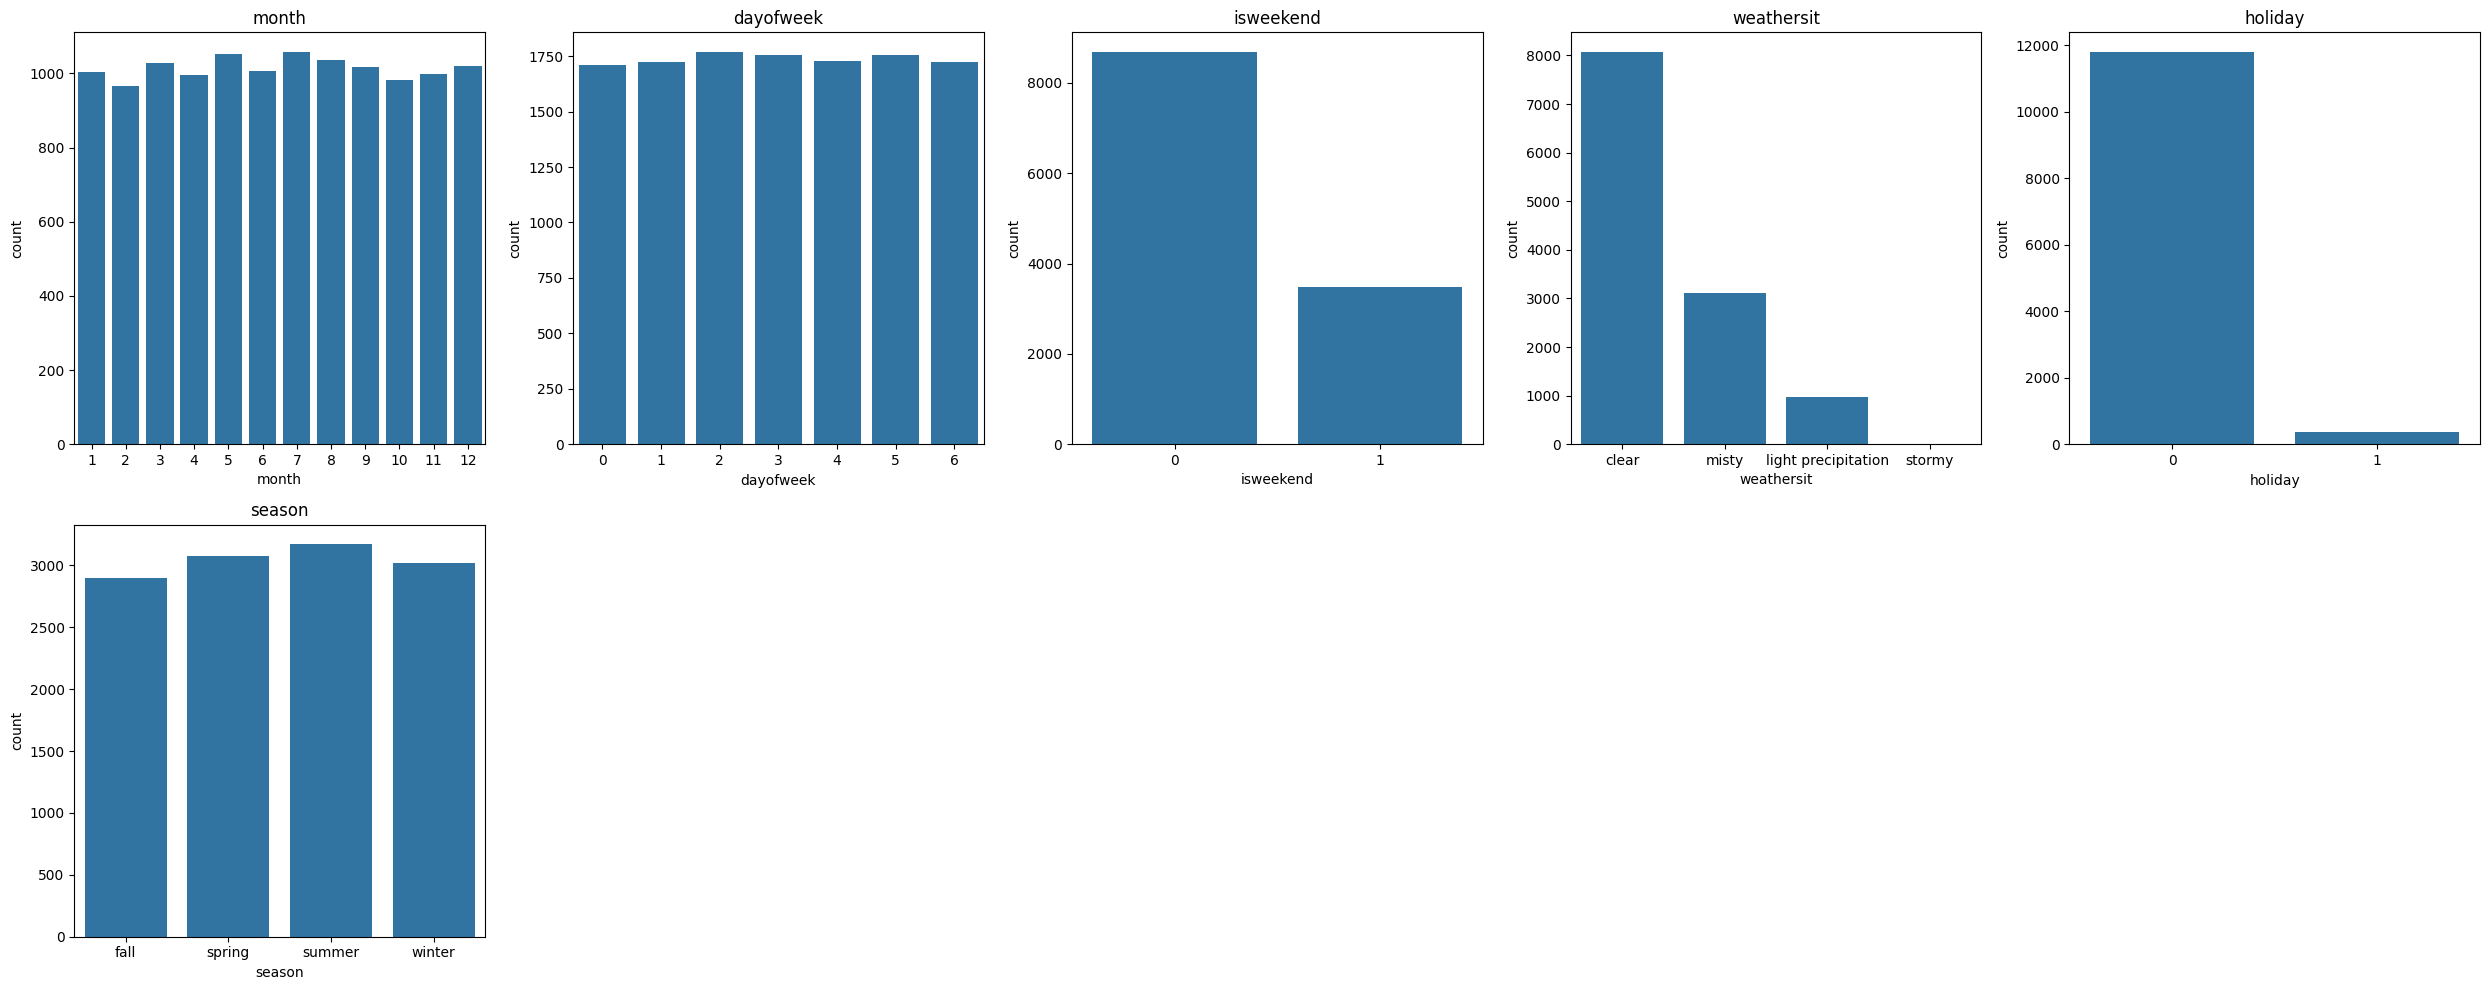

In [2310]:
plt.figure(figsize=(25, 10))

col_num = ['month', 'dayofweek', 'isweekend', 'weathersit', 'holiday', 'season']

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [2311]:
df.head()

,dteday,year,month,day,dayofweek,isweekend,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,2011,12,9,4,0,0.62,clear,0,fall,0.3485,0.36,16,24,226,250
1,2012-06-17,2012,6,17,6,1,0.64,clear,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,2011,6,15,2,0,0.53,clear,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,2012,3,31,5,1,0.87,misty,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,2012,7,31,1,0,0.55,clear,0,summer,0.6970,0.76,18,99,758,857


In [2312]:
df.groupby('year')['cnt'].median()

year
2011    110.0
2012    189.0
Name: cnt, dtype: float64

In [2313]:
df.groupby('month')['cnt'].median().sort_values(ascending=False)

month
7     202.0
6     201.0
8     198.0
9     194.0
5     193.0
10    175.0
4     142.0
11    142.0
3     103.0
12    102.0
2      82.0
1      66.0
Name: cnt, dtype: float64

In [2314]:
df.groupby('dayofweek')['cnt'].median().sort_values(ascending=False)

dayofweek
4    160.0
3    151.0
1    145.5
0    144.0
2    144.0
5    132.0
6    117.0
Name: cnt, dtype: float64

In [2315]:
df.groupby('season')['cnt'].median().sort_values(ascending=False)

season
summer    198.0
spring    165.5
fall      155.0
winter     76.0
Name: cnt, dtype: float64

In [2316]:
df.groupby('weathersit')['cnt'].median().sort_values(ascending=False)

weathersit
clear                  160.0
misty                  128.0
light precipitation     68.0
stormy                  36.0
Name: cnt, dtype: float64

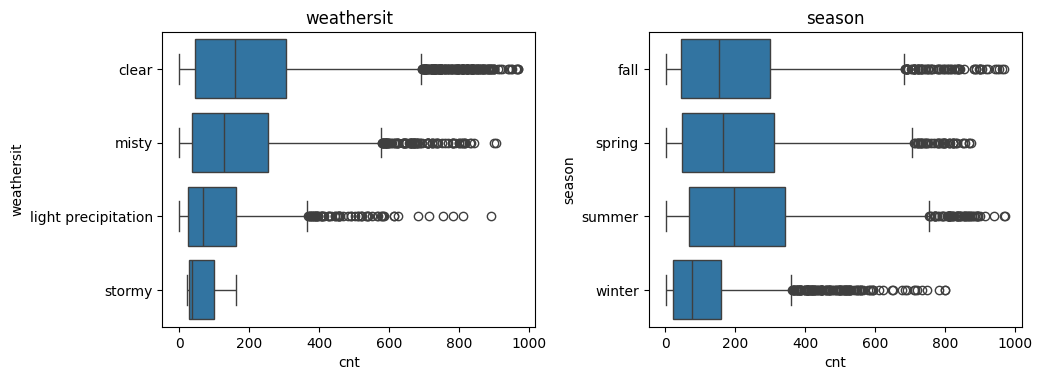

In [2317]:
plt.figure(figsize=(25, 7))

col_num = ['weathersit', 'season']

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x='cnt', y=col)
    # sns.scatterplot(data=df, x='cnt', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

**Weather:** People mostly rent bikes in clear, misty, or light precipitation weather, with only a few opting for bike rental during stormy conditions.

**Season:** Winter is expected to have less rental count than the other season because of the temperature.

Removing outliers in the `cnt` column.

In [2318]:
df = df[~(df['cnt'] > 950)]

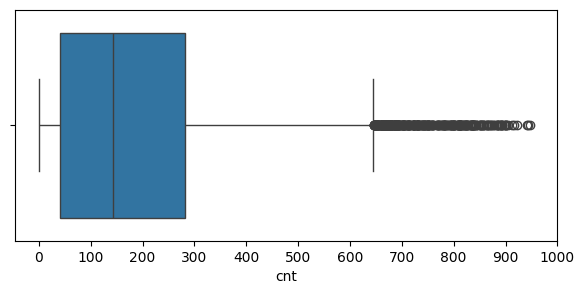

In [2319]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['cnt'])
plt.xticks(range(0,1001,100))
plt.show()

In [2320]:
df.shape

(12160, 16)

# **Modeling**

## **Define Features (X) and Target (y)**

In [2321]:
df.head(1)

,dteday,year,month,day,dayofweek,isweekend,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,2011,12,9,4,0,0.62,clear,0,fall,0.3485,0.36,16,24,226,250


Next, we will define the features and target.
- The `cnt` column will be the target.
- The `casual` and `registered` columns will be drop from the features because it is redundant, it would not provide meanigful insights since it has deterministic relationship with the target. Also, including features that have a direct relationship with target is considered data leakage.
- The `dteday` will be drop from the features because it cannot be computed and we already extracted the information from the column.
- The remaining columns will be the features.

In [2322]:
X = df.drop(columns=['dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']

## **Data Splitting**

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split

Next, split the data into training data and test data with a proportion of 80:20.

In [2324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Preprocessing**

In [ ]:
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [2326]:
X.head()

,year,month,day,dayofweek,isweekend,hum,weathersit,holiday,season,atemp,temp,hr
0,2011,12,9,4,0,0.62,clear,0,fall,0.3485,0.36,16
1,2012,6,17,6,1,0.64,clear,0,spring,0.5152,0.54,4
2,2011,6,15,2,0,0.53,clear,0,spring,0.6212,0.62,23
3,2012,3,31,5,1,0.87,misty,0,spring,0.3485,0.36,8
4,2012,7,31,1,0,0.55,clear,0,summer,0.6970,0.76,18


Encode categorical features, such as `weathersit` and `season`. Since both columns only contain 4 values, we will use one-hot encoding. For numerical features, we will scale `hum`, `atemp`, and `temp` so the model can effectively learn the relationship between them, ensuring that variables with larger ranges do not dominate the model's learning process. Robust scaling will be applied to these features.

In [2327]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['weathersit', 'season']),
    ('scaler', RobustScaler(), ['hum', 'atemp', 'temp'])
], remainder='passthrough')

## **Cross Validation**

In [ ]:
# cross validation
from sklearn.model_selection import cross_validate

# modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

> **Choose a Benchmark Model**

In [ ]:
# define algorithm
linreg = LinearRegression()
lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)
tree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

list_algo = [linreg, lasso, ridge, tree, knn, rf, xgb]
scorer = ['neg_root_mean_squared_error',
          'neg_mean_absolute_error',
          'neg_mean_absolute_percentage_error']

list_mean_rmse = []
list_std_rmse = []
list_mean_mae = []
list_std_mae = []
list_mean_mape = []
list_std_mape = []

for algorithm in list_algo:
    # define model algorithm
    model = algorithm

    # pipeline model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross validation score
    cv_score = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring=scorer,
        cv=5
    )
    
    # scoring
    list_mean_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())
    list_mean_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())
    list_mean_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [2330]:
cv_score

{'fit_time': array([0.14146423, 0.12613606, 0.160254  , 0.14221406, 0.13468909]),
 'score_time': array([0.00356817, 0.00440979, 0.00346708, 0.0034411 , 0.00341797]),
 'test_neg_root_mean_squared_error': array([-41.1915625 , -45.1168051 , -41.74746458, -41.40627959,
        -44.65341926]),
 'test_neg_mean_absolute_error': array([-26.14128367, -28.02735498, -26.92423219, -26.39488771,
        -27.45915259]),
 'test_neg_mean_absolute_percentage_error': array([-0.43144726, -0.48741089, -0.44686895, -0.42875151, -0.43508328])}

In [ ]:
df_cv = pd.DataFrame({
    'algorithm': list_algo,
    'mean_RMSE': list_mean_rmse,
    'std_RMSE': list_std_rmse,
    'mean_MAE': list_mean_mae,
    'std_MAE': list_std_mae,
    'mean_MAPE': list_mean_mape,
    'std_MAPE': list_std_mape
})
df_cv

,algorithm,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,LinearRegression(),-141.820919,1.425260,-106.546616,0.781048,-3.318779,0.135978
1,Lasso(random_state=42),-142.306805,1.529274,-106.494734,0.814358,-3.325749,0.156682
2,Ridge(random_state=42),-141.820972,1.425911,-106.543463,0.781838,-3.318350,0.136235
3,DecisionTreeRegressor(random_state=42),-63.363911,4.030587,-37.697221,1.648437,-0.395417,0.022417
4,KNeighborsRegressor(),-82.704960,1.441333,-53.644911,0.412533,-0.689644,0.008456
5,RandomForestRegressor(random_state=42),-46.443051,1.620810,-28.400959,0.556539,-0.343898,0.012141
6,"XGBRegressor(base_score=None, booster=None, ca...",-42.823106,1.699261,-26.989382,0.689204,-0.445912,0.021652


Based on the value of RMSE and MAE, XGBBoost has the smallest value. The values of MAPE are expected to be quite big because the target include very small numbers (near zero). Next, predictions will be made using the best benchmark model, which is XGBoost.

The metric we will focus on is MAE because MAE is less sensitive to outliers compared to RMSE. It calculates the average absolute differences between predicted and actual values. Also, MAE is in the same unit as the target variable, making it easy to understand. Unlike MAPE, MAE is robust against zero values in the target.

## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

We have XGBoost as the best model for this case. XGBoost is an ensemble learning method. It is based on the gradient boosting method. Boosting algorithms work in a sequential approach. XGBoost creates an ensemble of decision trees to make predictions, where each tree corrects the errors of the previous one to create a more accurate and robust model. This makes it highly effective for complex regression tasks.

Next, we will tune the model to find the best combination of parameters that maximizes the model's performance.

Parameters that will be tuned:
- booster: specifies the type of booster (ensemble technique) to use, it can be gblinear, gbtree, or dart
    - gbtree and dart use tree based models, while gblinear uses linear function
- n_estimators: the number of boosting trees
    - Higher values increase the model complexity and training time

Parameters for tree booster (gbtree or dart):
- max_depth: the maximum depth of a tree
    - Deeper trees may result in overfitting
- eta (learning_rate): step size shrinkage used in update to prevent overfitting
- gamma: minimum loss reduction required to make a further partition on a leaf node of the tree
    - A high gamma makes the algorithm more conservative/simple
- subsample: subsample ratio of the training instances
- min_child_weight: the minimum sum of instance weight needed in a child
    - Higher values make the algorithm more conservative by preventing splits that result in small leaf nodes

*source: [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)

In [ ]:
# best algorithm
model = XGBRegressor(random_state=42)

# hyperparam
hyperparam = {
    'modeling__booster': ['gbtree', 'dart'],
    'modeling__max_depth': list(range(2,11)),
    'modeling__eta': list(np.arange(1, 101)/100),
    'modeling__gamma': list(range(1,11)),
    'modeling__n_estimators': list(np.arange(50,101)),
    'modeling__subsample': list(np.arange(5,11)/10),
    'modeling__min_child_weight': list(np.arange(1,5))
    }

scorer = ['neg_root_mean_squared_error',
          'neg_mean_absolute_error',
          'neg_mean_absolute_percentage_error']

# pipeline mode
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# randomized search
randomsearch = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam,
    cv=5,
    scoring=scorer,
    refit='neg_mean_absolute_error',
    n_iter=1000,
    n_jobs=-1,
    random_state=42
)

In [2334]:
randomsearch.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weathersit',
                                                                                'season']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['hum',
                                                                                'atemp',
                                                                                'temp'])])),
                                             ('modeling',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=Non...
                                                                   np.int64(74),
                                                                   np.int64(75),
                                                                   np.int64(76),
                                                                   np.int64(77),
                                                                   np.int64(78),
                                                                   np.int64(79), ...],
                                        'modeling__subsample': [np.float64(0.5),
                                                                np.float64(0.6),
                                                                np.float64(0.7),
                                                                np.float64(0.8),
                                                                np.float64(0.9),
                                                                np.float64(1.0)]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [2335]:
randomsearch.best_params_

{'modeling__subsample': np.float64(0.9),
 'modeling__n_estimators': np.int64(95),
 'modeling__min_child_weight': np.int64(1),
 'modeling__max_depth': 8,
 'modeling__gamma': 9,
 'modeling__eta': np.float64(0.12),
 'modeling__booster': 'gbtree'}

In [2336]:
# pd.set_option('display.max_columns', None)

In [2337]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_neg_mean_absolute_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__subsample,param_modeling__n_estimators,param_modeling__min_child_weight,param_modeling__max_depth,param_modeling__gamma,param_modeling__eta,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
849,0.441011,0.020846,0.015175,0.003219,0.9,95,1,8,9,0.12,...,0.460812,1,-0.323702,-0.342552,-0.333593,-0.307458,-0.324008,-0.326263,0.011699,10
979,9.107683,0.098421,0.043309,0.010657,0.8,89,2,9,10,0.11,...,0.451999,2,-0.309008,-0.305712,-0.315873,-0.302105,-0.319286,-0.310397,0.006350,2
964,10.657812,0.148596,0.050854,0.021787,0.6,98,4,9,2,0.11,...,0.306095,3,-0.335071,-0.329129,-0.335927,-0.306307,-0.325824,-0.326451,0.010747,11
319,0.221757,0.010873,0.013983,0.002995,0.8,78,3,8,9,0.13,...,0.261080,4,-0.336290,-0.338242,-0.351706,-0.323845,-0.334705,-0.336957,0.008907,30
592,0.456569,0.028103,0.015784,0.002095,0.8,86,1,9,7,0.12,...,0.303767,5,-0.316065,-0.325444,-0.322294,-0.305570,-0.321793,-0.318233,0.007017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,3.537526,0.072195,0.024840,0.002481,0.5,57,1,7,5,0.01,...,0.717619,996,-4.524731,-4.562400,-4.574371,-4.318128,-4.478757,-4.491677,0.092972,998
735,0.108052,0.005452,0.008901,0.002558,0.8,64,2,5,9,0.01,...,0.908450,997,-4.294030,-4.330715,-4.329431,-4.100996,-4.247934,-4.260621,0.085329,995
87,0.089602,0.005417,0.009946,0.003538,0.5,54,1,6,5,0.01,...,0.732203,998,-4.670007,-4.712256,-4.717201,-4.460969,-4.627351,-4.637557,0.094089,999
885,7.106527,0.100845,0.039318,0.006998,0.9,87,1,2,7,0.01,...,0.906202,999,-4.032833,-4.099835,-4.064961,-3.865200,-3.991406,-4.010847,0.081144,993


## **Predict**

> **Before Tuning**

In [2338]:
# define model and pipeline
model = XGBRegressor(random_state=42)

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_model.predict(X_test)

# evaluation metric
rmse_before_tuning = np.sqrt(mean_squared_error(y_test, y_pred_before))
mae_before_tuning = mean_absolute_error(y_test, y_pred_before)
mape_before_tuning = mean_absolute_percentage_error(y_test, y_pred_before)

pd.DataFrame({'RMSE': [rmse_before_tuning], 'MAE': [mae_before_tuning], 'MAPE': [mape_before_tuning]})

,RMSE,MAE,MAPE
0,40.389375,25.436918,0.451499


> **After Tuning**

In [2339]:
# define model
best_model = randomsearch.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred_after = best_model.predict(X_test)

# evaluation metric
rmse_after_tuning = np.sqrt(mean_squared_error(y_test, y_pred_after))
mae_after_tuning = mean_absolute_error(y_test, y_pred_after)
mape_after_tuning = mean_absolute_percentage_error(y_test, y_pred_after)

pd.DataFrame({'RMSE': [rmse_after_tuning], 'MAE': [mae_after_tuning], 'MAPE': [mape_after_tuning]})

,RMSE,MAE,MAPE
0,37.717572,22.921312,0.3385


> **Summary**

Compare XGBoost model's performance before and after hyperparameter tuning.

In [2379]:
print(f'''Before Tuning
-------------
RMSE:   {round(rmse_before_tuning, 2)}
MAE:    {round(mae_before_tuning, 2)}
MAPE:   {round(mape_before_tuning, 2)*100}%

After Tuning
------------
RMSE:   {round(rmse_after_tuning, 2)}
MAE:    {round(mae_after_tuning, 2)}
MAPE:   {round(mape_after_tuning, 2)*100}%
''')

Before Tuning
-------------
RMSE:   40.39
MAE:    25.44
MAPE:   45.0%

After Tuning
------------
RMSE:   37.72
MAE:    22.92
MAPE:   34.0%



The RMSE, MAE, and MAPE values have decreased, indicating a significant performance improvement in the model after hyperparameter tuning.

Next, we will calculate the MAE normalized by target median.

In [2341]:
df['cnt'].median()

np.float64(142.0)

In [2462]:
round(mae_after_tuning/df['cnt'].median()*100, 1)

np.float64(16.1)

The value above indicates that, on average, the error is around 16.1% of the target median.

> **Residual**

In [2344]:
df_error = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_after,
    'residual': (y_test - y_pred_after)
})

In [2345]:
df_error

,y_test,y_pred,residual
8500,151,171.363007,-20.363007
4049,213,188.638763,24.361237
8299,20,12.982010,7.017990
7362,626,531.768555,94.231445
10258,172,149.160095,22.839905
...,...,...,...
10743,87,105.040787,-18.040787
11436,106,130.435486,-24.435486
11202,2,0.386310,1.613690
412,256,250.508667,5.491333


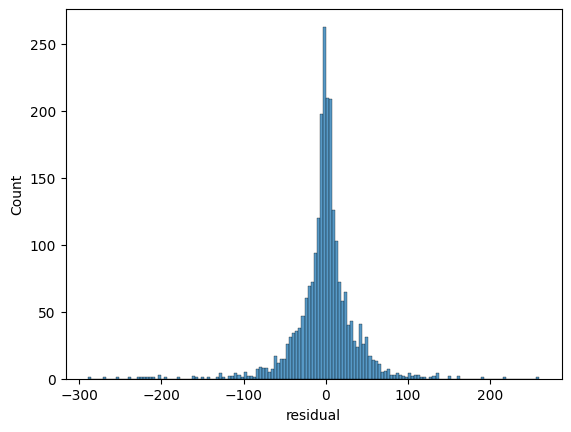

In [2346]:
sns.histplot(x=df_error['residual'])
plt.show()

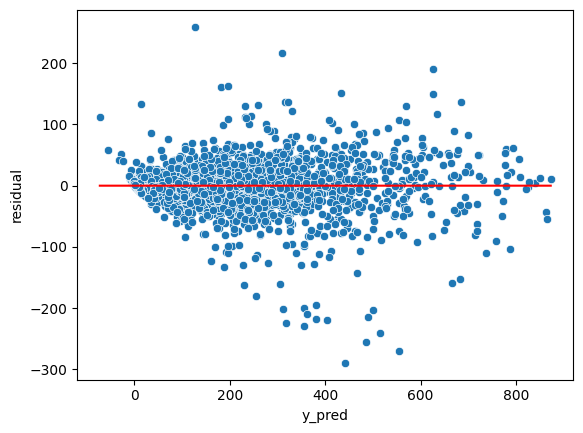

In [2347]:
sns.scatterplot(data=df_error, x='y_pred', y='residual')
sns.lineplot(data=df_error, x='y_pred', y=0, color='red')
plt.show()

From the residual plot above, we can see that the residuals exhibit no pattern and are randomly scattered around the zero line. For predicted values greater than 400, the spread of residuals increases, indicating the model's predictions are less accurate for higher rental counts. This suggests that the model struggles to predict accurately as the rental count becomes large.

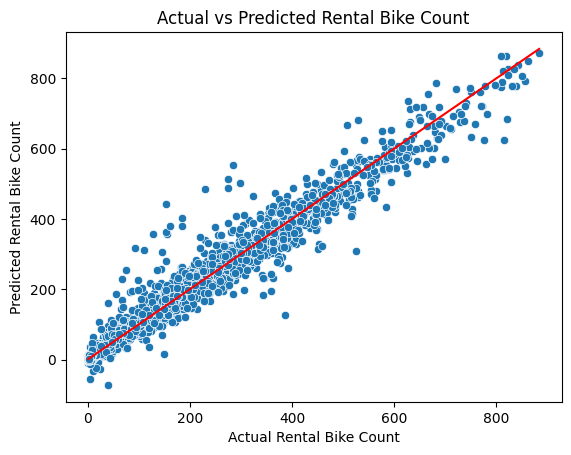

In [ ]:
plt.title('Actual vs Predicted Rental Bike Count')
sns.scatterplot(x=y_test, y=y_pred_after)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Rental Bike Count')
plt.ylabel('Predicted Rental Bike Count')
plt.show()

The points cluster tightly around the red line, indicating that the model's prediction closely match the actual rental counts.

# **Features Importance**

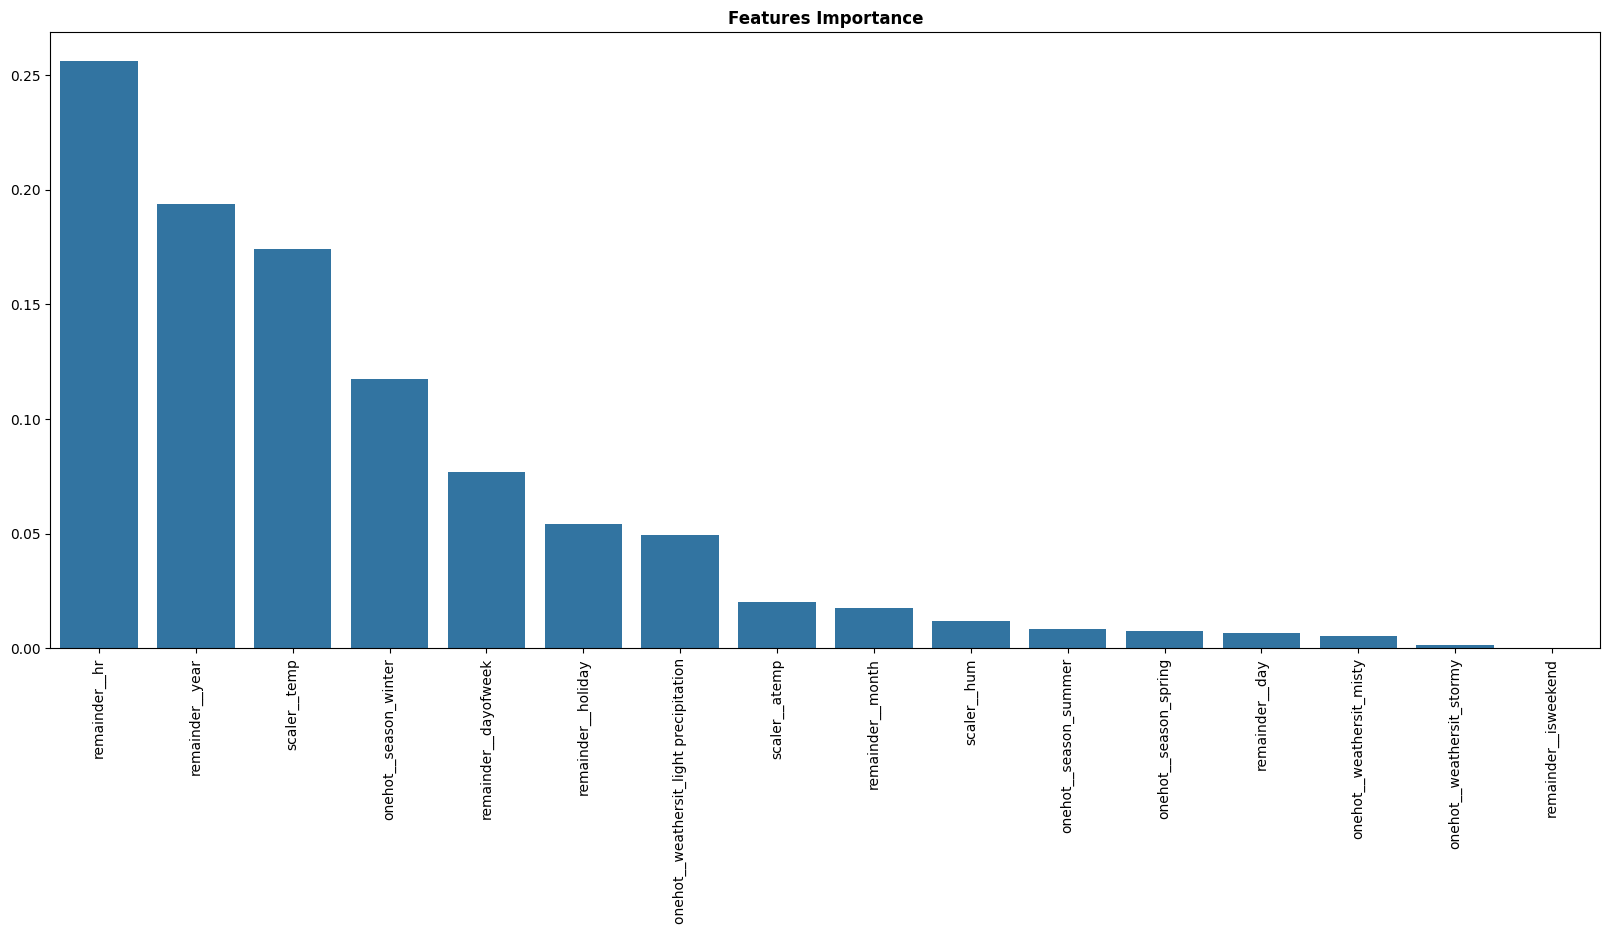

In [2349]:
features_imp = pd.Series(best_model['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False)

plt.figure(figsize=(20,8))
plt.title('Features Importance', fontweight='bold')
sns.barplot(features_imp)
plt.xticks(rotation=90)
plt.show()

From the feature importance plot above, we can conclude that `hr` (hour) is the features that influenced the target, `cnt`, the most. Followed by `year`, `temp`, and winter season.

In [2418]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [2406]:
print(randomsearch.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['weathersit', 'season']),
                                                 ('scaler', RobustScaler(),
                                                  ['hum', 'atemp', 'temp'])])),
                ('modeling',
                 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device...
                              eval_metric=None, feature_types=None, gamma=9,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_thres

In [2434]:
X_transformed = randomsearch.best_estimator_['preprocessing'].transform(X)
feature_names = randomsearch.best_estimator_['preprocessing'].get_feature_names_out()

In [2435]:
explainer = LimeTabularExplainer(
    training_data=X_transformed,
    feature_names=feature_names,
    mode='regression',
    random_state=42
)

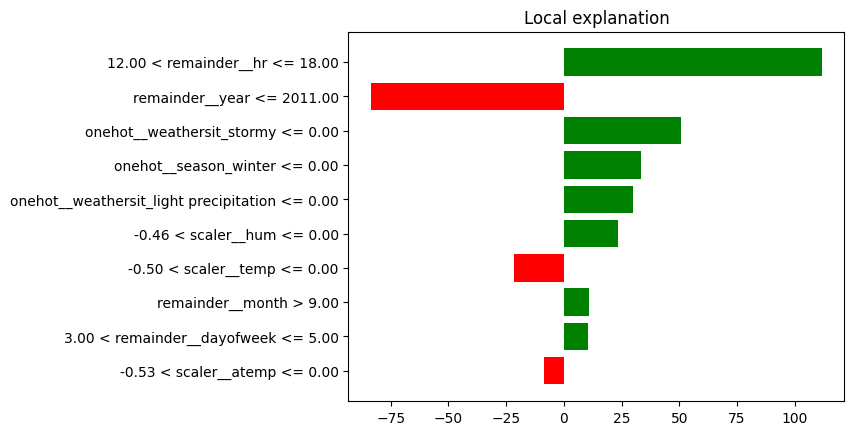

In [2441]:
explanation = explainer.explain_instance(
    data_row=X_transformed[0],
    predict_fn=randomsearch.best_estimator_['modeling'].predict
)

explanation.as_pyplot_figure()
plt.show()

In [2444]:
explanation = explainer.explain_instance(
    data_row=X_transformed[0],
    predict_fn=randomsearch.best_estimator_['modeling'].predict
)

explanation.show_in_notebook()

The model predict 221 bikes for this specific instance (the first row of X_transformed).

The hour of the day (16 or 4 PM), weather (light precipitation), and season (winter) significantly increase bike rental demand for this prediction. While the year (2011) and temperature (low) reduce the prediction. Positive contributors outweight the negative ones, resulting in a relatively high predicted count of 221 (221.74) bikes.

# **Conclusion**

**Conclusion**

Based on the modeling we have conducted above, features hr (hour), year, temp (temperature), and season are the most influential features with respect to the target.

The evaluation metrics used include RMSE, MAE, and MAPE. All evaluation metrics showed improvement after tuning, indicating better predictive accuracy and reduced error. The RMSE decreased from 40.4 to 37.7, the MAE decreased from 25.4 to 22.9, and the MAPE decreased from 45% to 34%. As previously mentioned, our primary focus is on MAE. After hyperparameter tuning, the model achieved a MAE of approximately 22.9, indicating that the model's predictions are off by 23 bikes on average. This MAE corresponds to roughly 16% of the target median. This suggests that, on average, the model's prediction error is relatively small when compared to the typical rental bike counts.

Overall, the model demonstrates good performance in predicting rental bike demand. With an average error of approximately 23 bikes, the model is acceptable enough for operational planning. This can be used to forecast inventory management or prevent shortages during high-demand periods.

**Limitation**

The model performs quite well for predicting rental counts below 950.

# **Recommendation**

Things that can be done to improve the model:
- As shown in the residuals plot above, there are still some significant errors. We can investigate outliers (large residuals) to understand whether they arise from data entry errors  or other factors that may require further adjustments.
- Consider transforming the target variable.
- If possible, add features that are more correlated with the target ('cnt'), such as station data to identify which locations are the most popular.

From business perspective:
- Since, 'hr' (hour) is one of key factors affecting the target, optimize bike availability during peak hours. To meet the demand, consider increasing bikes during these peak hours especially in high-traffic locations.
- The model also highlights the importance of season and weather conditions in predicting the rental bike demand. Routine maintenance during favorable weather to capitalize on increased demand.
- Create a promotional strategies to maintain growth in bike rentals, such as targeted campaigns or pricing adjustments.

# **Save Model**

In [2353]:
import pickle

In [2463]:
# best model
xgb_tuning = randomsearch.best_estimator_
xgb_tuning

# fit
xgb_tuning.fit(X, y)

# save with pickle
pickle.dump(xgb_tuning, open('xgboost_model.sav', 'wb'))